##Twins Movie subgoups glm fir

###EXP1a: Scrubbing off - Normalisation 'fir_shape' - scale sci10_scg7_scf7

In [6]:
%% Parameters
clear all
addpath(genpath('/home/yassinebha/github_repos/Projects/Misc'));
addpath(genpath('/home/yassinebha/github_repos/Projects/HCP/'));
path_root =  '/notebooks/twins_movie/';
list_scale = { 'sci10_scg7_scf7'};
tr = {'3000'};

In [7]:
fir = 'fir_shape';
scrub = '_noscrub';
list_cov = { 'dominic_dep','sexe','FD' };
list_remove_pheno = { 'frames_OK','frames_scrubbed'};

In [8]:
%%Load phenotypes and scrubbing data
%combine pheno and scrubbing
pheno_raw = niak_read_csv_cell('/home/yassinebha/github_repos/twins/script/models/twins/dominic_dep_group0a1_minus_group11a20_tmp2.csv');
master_cell = pheno_raw;
files_out  = niak_grab_all_preprocess([path_root 'fmri_preprocess_EXP2_test2']);
slave_cell = niak_read_csv_cell(files_out.quality_control.group_motion.scrubbing);
ly = slave_cell(1,:);
slave_cell = slave_cell(2:end,:);
%mask_slave_cell = strfind(slave_cell(:,1),[task tr{1}]);%mask selected task and tr
%mask_slave_cell = cellfun(@isempty,mask_slave_cell);
%slave_cell(mask_slave_cell,:) = [];
slave_cell = [ly; slave_cell];
for cc = 1:length(slave_cell)-1;
    slave_cell{cc+1,1} = slave_cell{cc+1,1}(1:end-14);
end

In [10]:
pheno = combine_cell_tab(master_cell,slave_cell);

 5 10 15 20 25 30 35 40 45 50 55 60 65 70 75 80 85 90 95 100


In [11]:
niak_write_csv_cell('/home/yassinebha/Desktop/pheno_test.csv',pheno);

ans = 0


In [12]:
%%cleannig data
%remove unused pheno
mask_remove_pheno = ones(1,size(pheno,2));
for cc = 1: length(list_remove_pheno)
    mask_tmp = strfind(pheno(1,:),list_remove_pheno{cc});
    mask_tmp = cellfun(@isempty,mask_tmp);
    mask_remove_pheno = mask_remove_pheno & mask_tmp ;
end
pheno(:,~mask_remove_pheno)=[];
pheno(:,9)=[];%remove extra id colomn
lx = pheno(2:end,1);
ly = pheno(1,2:end)';
pheno = pheno(2:end,2:end);

In [13]:
%% Load data
for tt = 1:length(list_scale)
    path_read  = [path_root 'stability_fir_all_sad_blocs_EXP2_test2/stability_group/fir/'];
    path_fmri  = [path_root 'fmri_preprocess_EXP2_test2/fmri/'];
    list_files = dir([path_read 'fir_group_level_*']);
    list_files = {list_files.name};
    
    for ff = 1:length(list_files);
        subject = list_files{ff}(17:end-4);
        ind_s = find(ismember(lx,subject));
        if isempty(ind_s)
            warning('Could not find subject %s',subject)
            list_files{ff}= [];
        end
    end
    list_files(cellfun(@isempty,list_files)) = [];   %remove empty cells 
    pheno_r = cell(length(list_files),size(pheno,2));
    for ff = 1:length(list_files);
        subject = list_files{ff}(17:end-4);
        ind_s = find(ismember(lx,subject));
        pheno_r(ff,:) = pheno(ind_s,:);
        data = load([path_read list_files{ff}],list_scale{tt});
        fir_all{tt}(:,:,ff) = data.(list_scale{tt}).fir_mean;
    end
end

In [18]:
%%convert all pheno from string to numeric
pheno_num = zeros(size(pheno_r));
for xx = 1:size(pheno_r,1)
    %for yy = 1:size(pheno_r,2)
    for yy = 1:size(pheno_r,2)
        if isempty(pheno_r{xx,yy})
            pheno_num(xx,yy) = NaN;
        else
            pheno_num(xx,yy) = str2num(pheno_r{xx,yy});
        end
    end
end

In [41]:
% visualise the partition
path_scales =  [path_root 'stability_fir_all_sad_blocs_EXP2_test2/stability_group/' list_scale{1} ];
opt.flag_zip = true;
niak_brick_mnc2nii(path_scales,[path_scales '_nii'],opt)

In [43]:
cd([path_scales '_nii'])
max_effect_vol(['brain_partition_consensus_group_' list_scale{1} '.nii.gz'],['fdr_group_average_' list_scale{1} '.mat']);

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


####Switch to python for visualization

In [2]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.patches as mpatches
import nibabel as nib
import scipy.io as sio
from nilearn import plotting, image
from nilearn.image.image import mean_img
from nilearn.plotting.img_plotting import plot_epi, plot_roi

In [14]:
##load fir
fir_mat = sio.loadmat('/notebooks/twins_movie/stability_fir_all_sad_blocs_EXP2_test2/stability_group/sci10_scg7_scf7_nii/fdr_group_average_sci10_scg7_scf7.mat')
###fir
test_fir = fir_mat['test_fir']
val_test_fir = test_fir[0,0]
fir_mean = val_test_fir['mean']
fir_std = val_test_fir['std']
fir_pce = val_test_fir['pce']
fir_test = val_test_fir['test']
fir_ttest = val_test_fir['ttest']
### diff fir
test_diff = fir_mat['test_diff']
val_test_diff = test_diff[0,0]
fir_mean_diff = val_test_diff['mean']
fir_std_diff = val_test_diff['std']
fir_pce_diff = val_test_diff['pce']
fir_test_diff = val_test_diff['test']
fir_ttest_diff = val_test_diff['ttest']

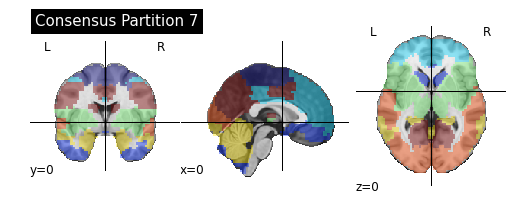

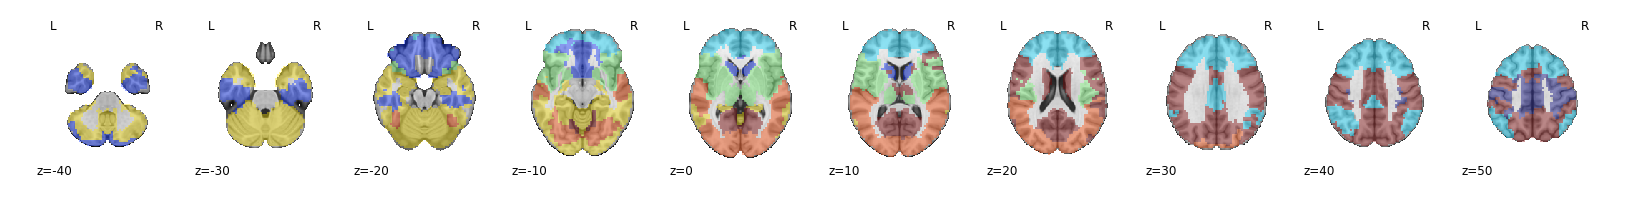

In [19]:
## plot FIR
#divide the color map by th number of networks 
scale = 7
values = range(scale)
cNorm  = colors.Normalize(vmin=0, vmax=values[-1])
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=plt.get_cmap('jet'))


## Display partitions
in_vol=nib.load('/notebooks/twins_movie/stability_fir_all_sad_blocs_EXP2_test2/stability_group/sci10_scg7_scf7_nii/brain_partition_consensus_group_sci10_scg7_scf7.nii.gz')
display = plotting.plot_anat('/home/yassinebha/database/white_template.nii.gz',
                             colorbar=False,
                             title="Consensus Partition %i"%(scale),
                             cut_coords=(0,0,0))

display.add_overlay(in_vol,cmap=cm.jet,alpha=0.4)
display = plotting.plot_anat('/home/yassinebha/database/white_template.nii.gz',
                             colorbar=False,
                             display_mode='z',
                             cut_coords= range(-40, 60, 10) 
                             )

display.add_overlay(in_vol,cmap=cm.jet,alpha=0.4)

##display each network
data=in_vol.get_data()
value=np.unique(data[data!=0]) 
new_shape = data.shape + (np.max(value),)
output= np.zeros(new_shape)
for ind, val in enumerate(value):
    output[data==val,ind] = val
out_image = nib.Nifti1Image(output, affine=in_vol.get_affine(), header=in_vol.get_header())

In [20]:
# plot significance function
def plot_signi(tst):
    """
    plot significance bars
    """
    signi_patch = mpatches.Patch(color='0.2',alpha=0.2,label='Significance')
    plt.legend(handles=[signi_patch])
    increm= 0
    for ind_tst, val_tst in enumerate(tst):
        if increm == 0: 
            if val_tst:
                init_fill = x[ind_tst]
                while tst[ind_tst+increm] and (ind_tst+increm) < len(tst)-1:
                    end_fill = x[ind_tst+increm]
                    increm = increm+1

                plt.axvspan(init_fill, end_fill, facecolor= '0.2', alpha=0.2, linewidth=1)
        else:
            increm=increm-1

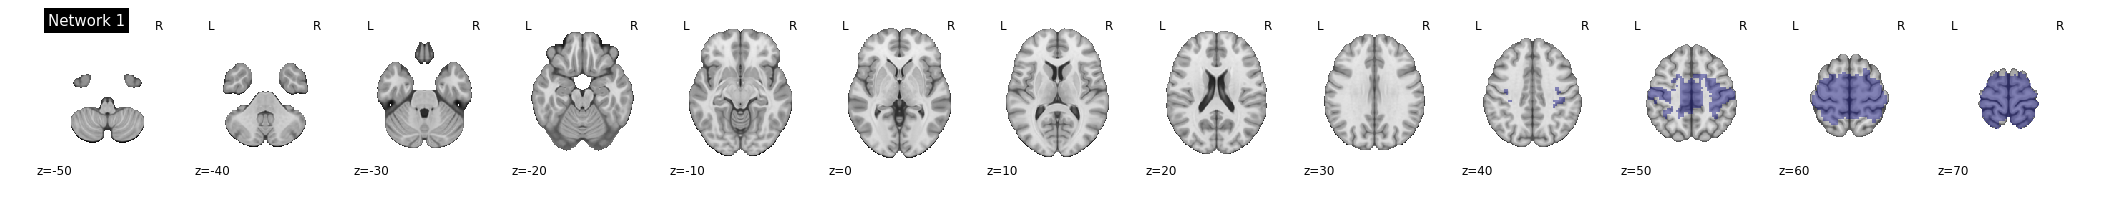

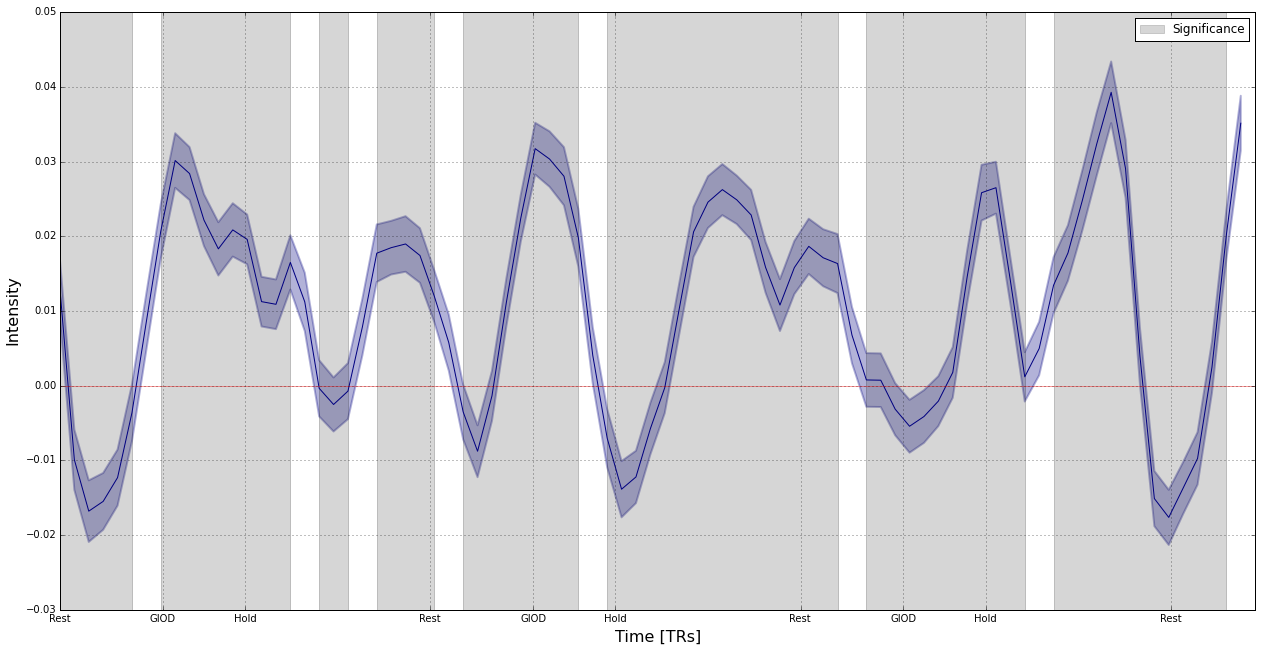

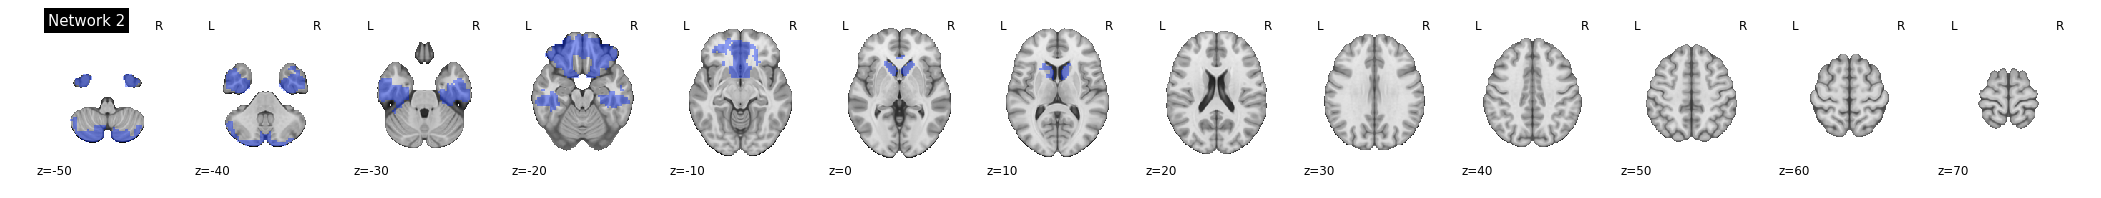

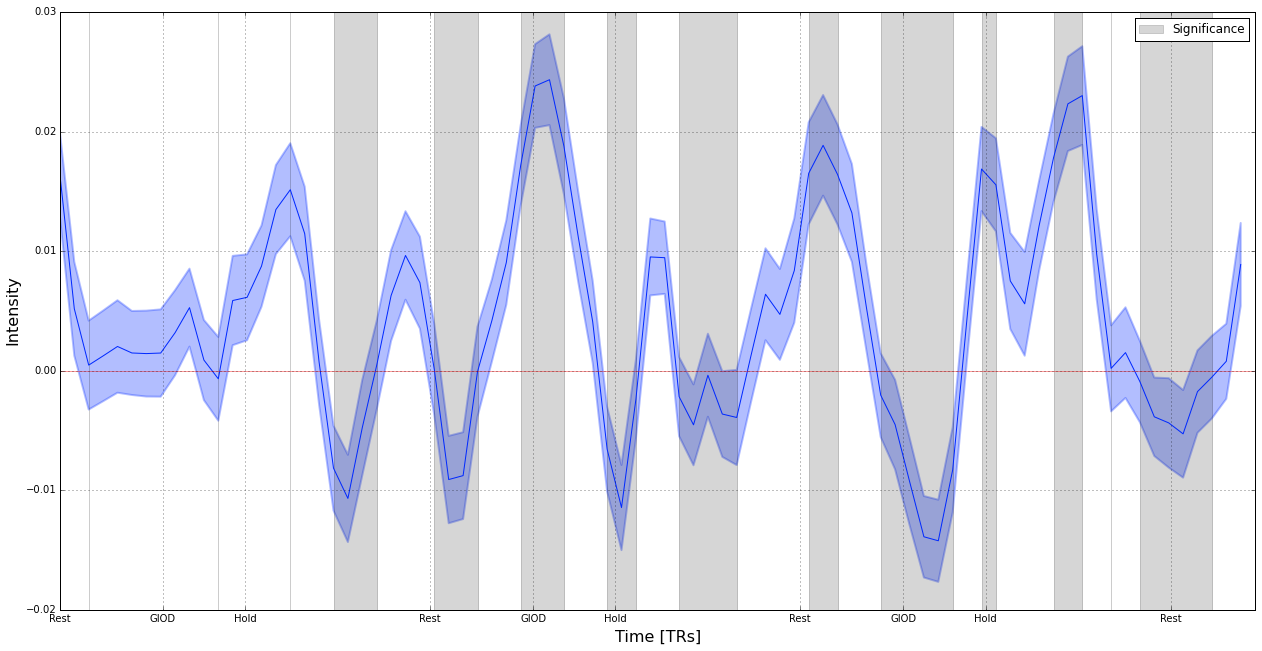

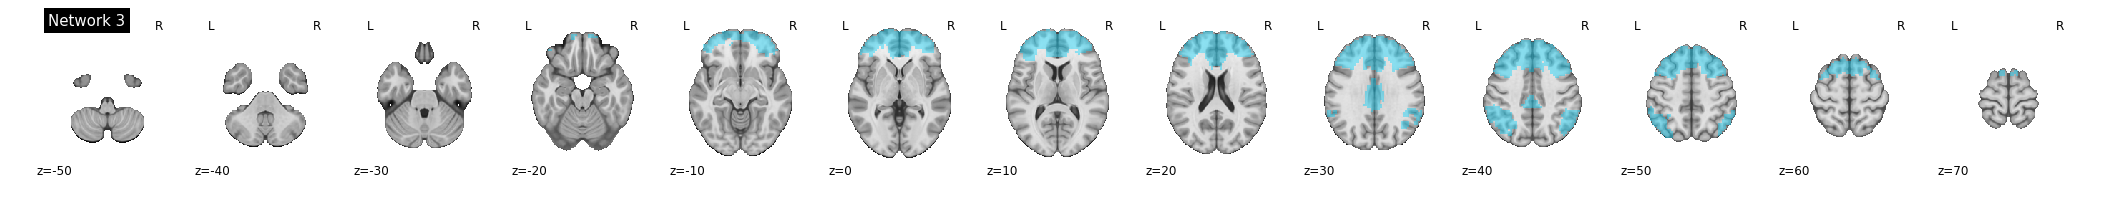

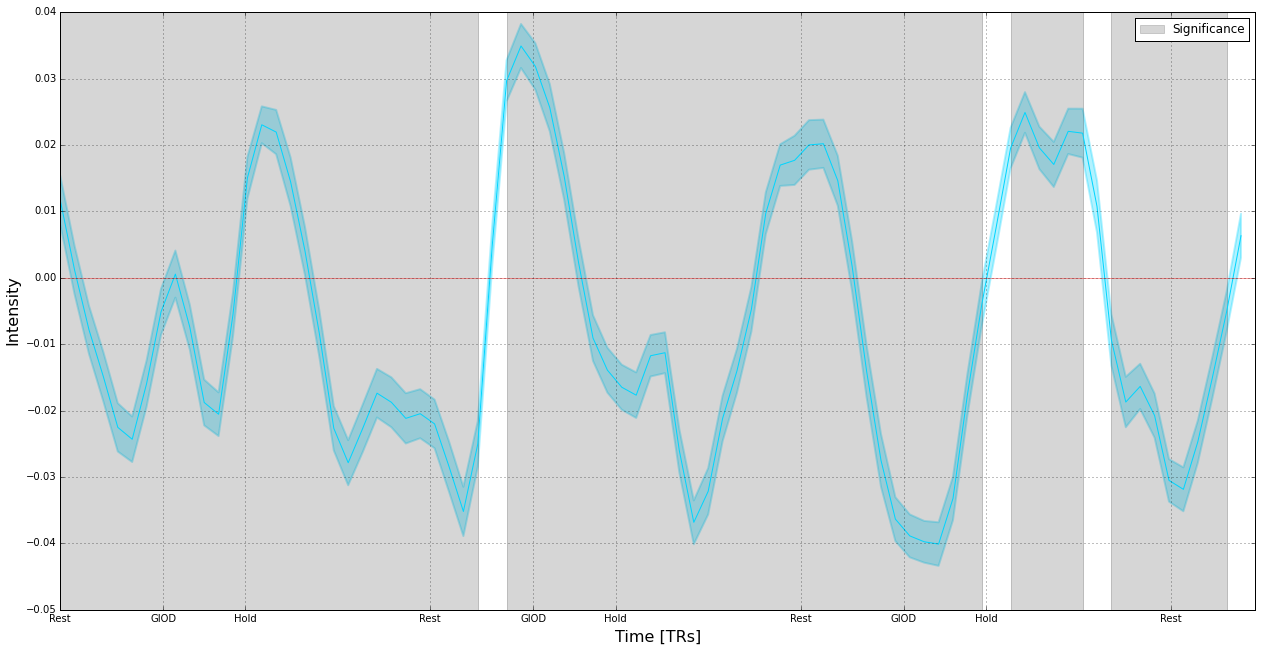

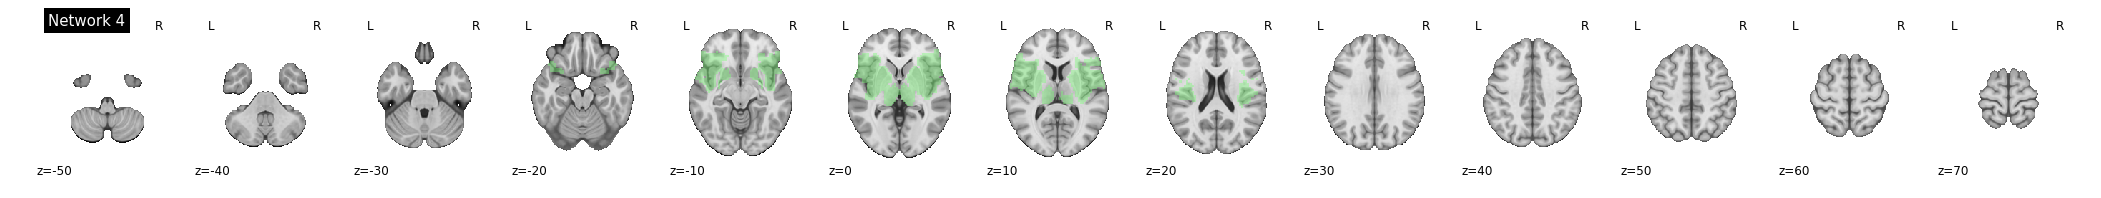

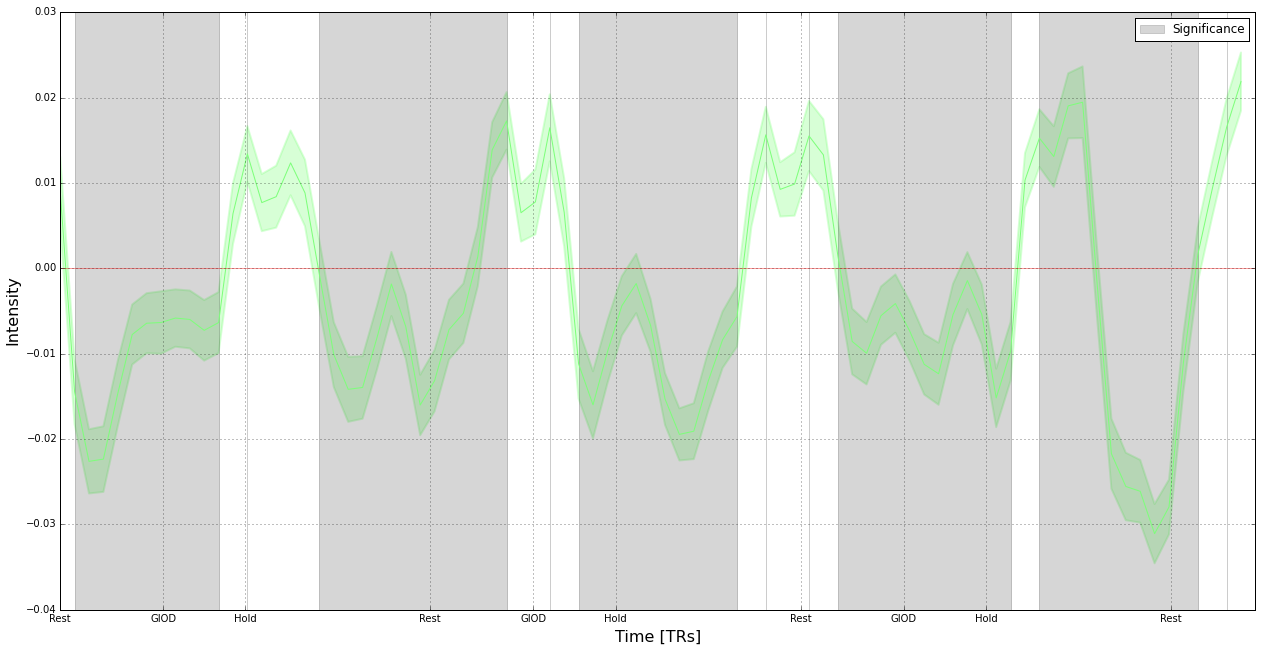

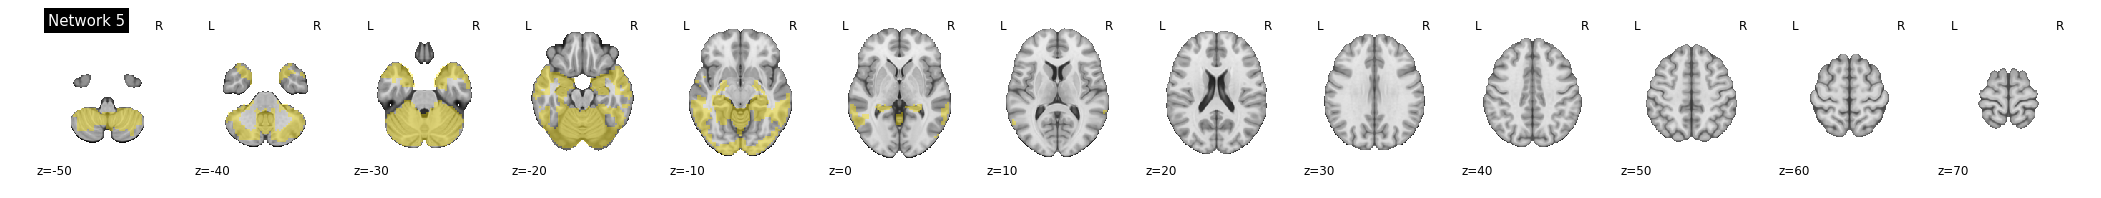

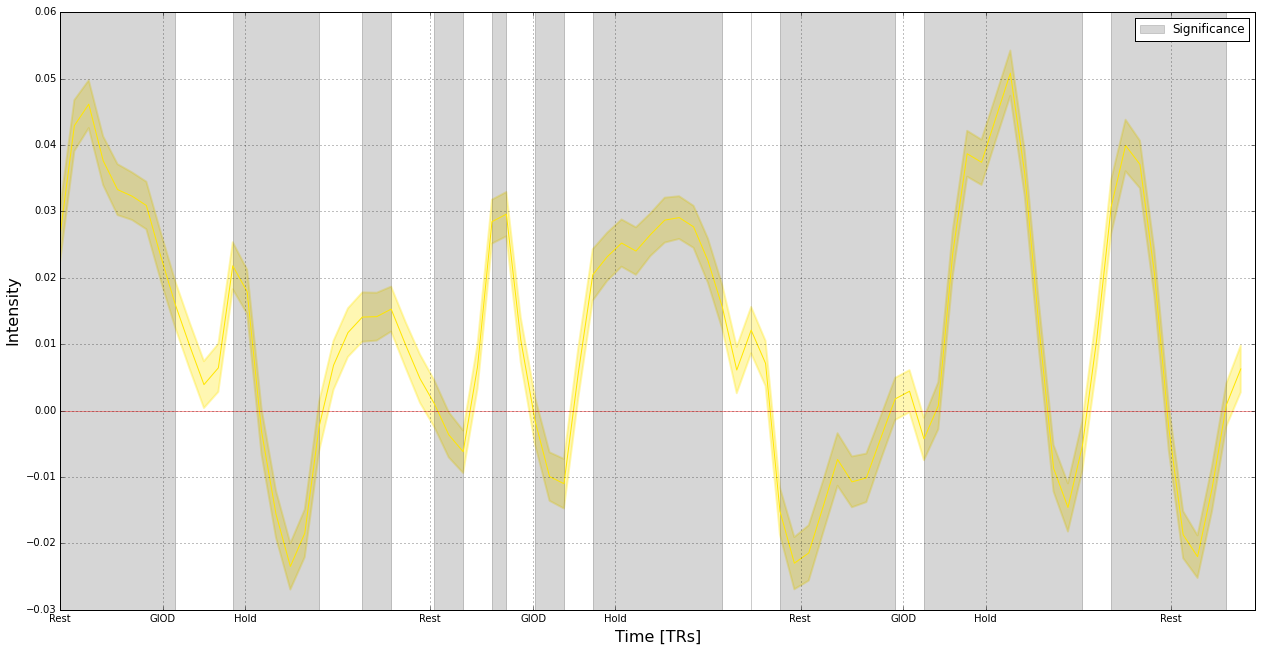

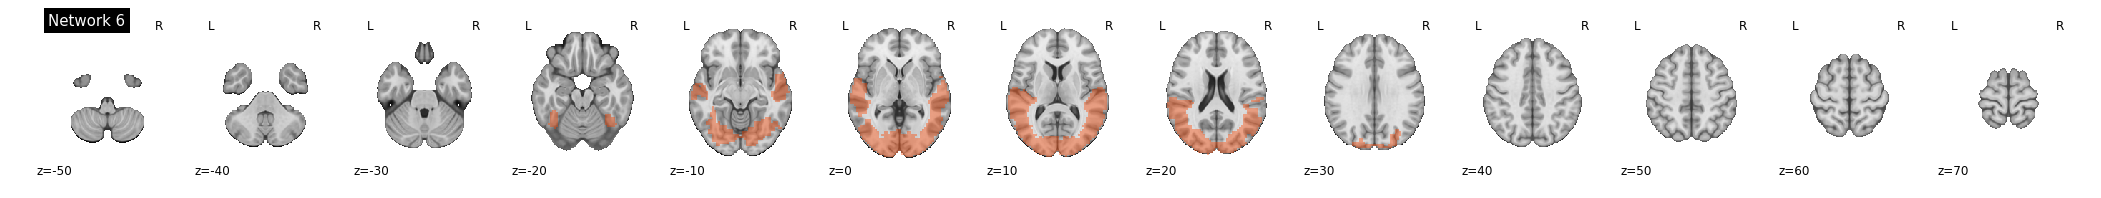

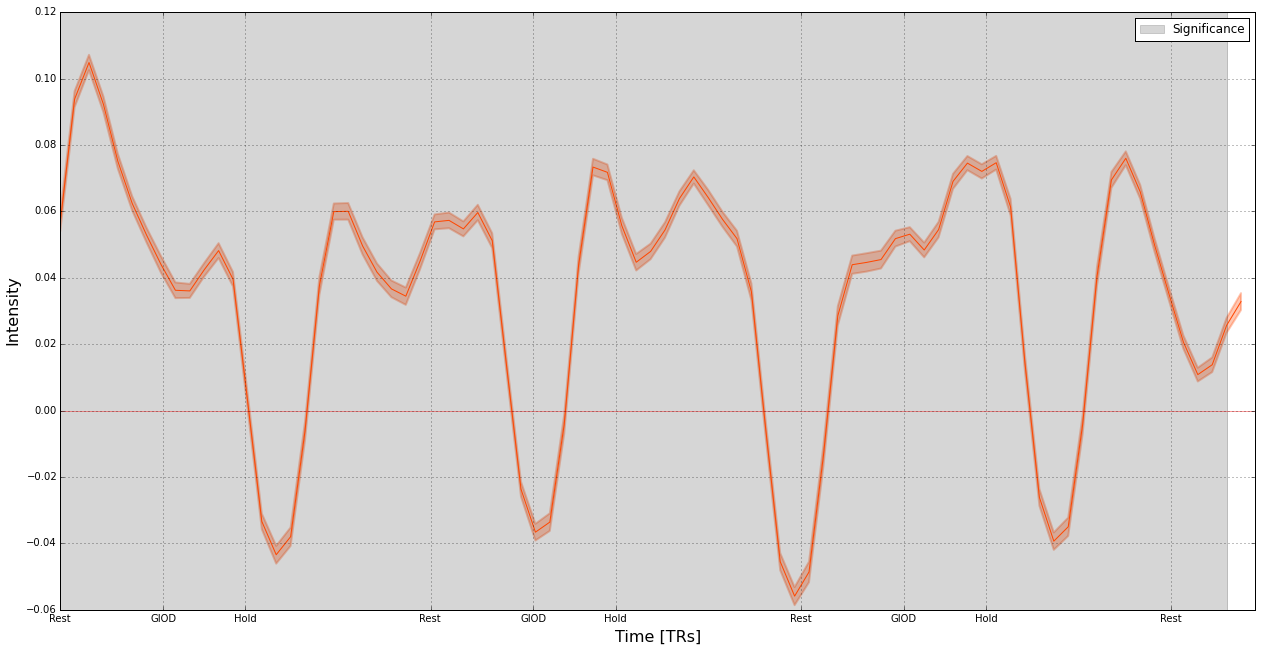

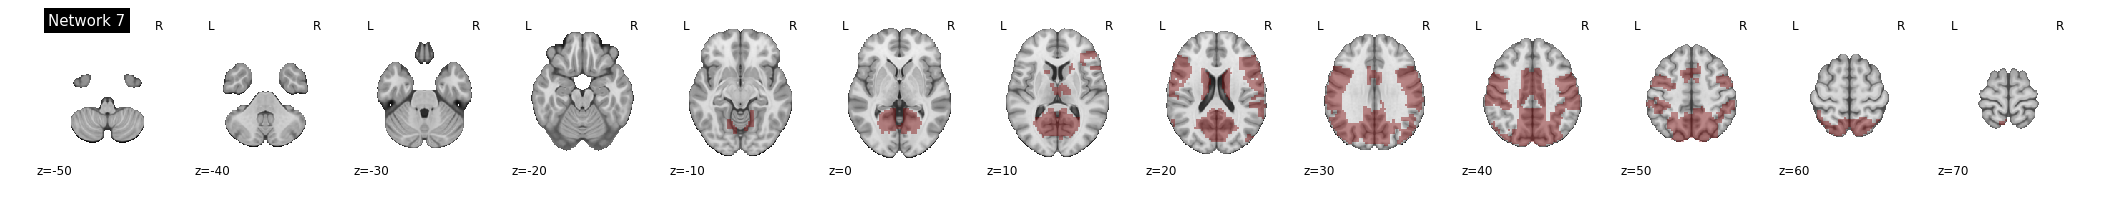

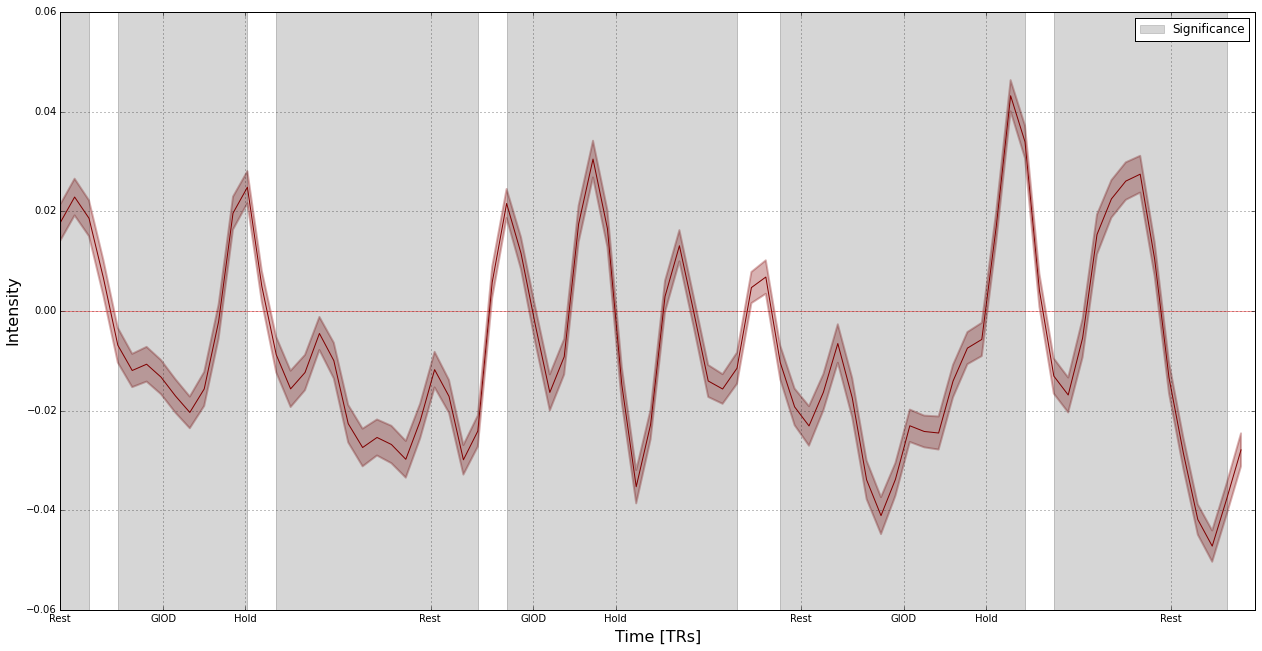

In [21]:
for network in range(scale):
    display = plotting.plot_anat('/home/yassinebha/database/white_template.nii.gz',
                             colorbar=False,
                             title="Network %i"%(network+1),
                             display_mode='z',
                             cut_coords= range(-50, 80, 10))
    display.add_overlay(image.index_img(out_image, network ),cmap=cm.jet,alpha=0.4, vmin=1, vmax=scale)
    # set varaiables
    x = np.array(range(fir_mean.shape[0]))
    y = fir_mean[:,network]
    std = fir_std[:,network]
    y += fir_std[:,network]
    tst =fir_test[:,network]
    #plot fir mean
    colorVal = scalarMap.to_rgba(values[network])
    plt.figure(figsize=(20, 10))
    plt.plot(x, y, 'k', color=colorVal)
    #set the timing as in the onset file
    ticks_num =[]
    ticks_labels = []
    for ii in range(1, 8): 
        ticks_num_tmp = (np.array([0, 10,18])+(36*(ii-1)))/1.4
        ticks_num = np.concatenate([ticks_num,ticks_num_tmp])
    ticks_num = np.concatenate([ticks_num,np.array([ticks_num[-1]+(18/1.4)])])
    ticks_labels = ['Rest','GIOD','Hold']*7 + ['End of onset']

    #plot labels and axes
    plt.xticks(ticks_num,ticks_labels)
    plt.grid()
    plt.subplots_adjust(bottom=.12, top=.95, right=.95, left=.12)
    plt.xlabel('Time [TRs]', fontsize=16)
    plt.ylabel('Intensity', fontsize=16)
    plt.xlim(0, fir_mean.shape[0])
    plt.axhline(linewidth=1, color='r',alpha=0.4)
    plt.axvline(x=ticks_num[-1], color='r',alpha=0.4, linewidth=2)

    # plot std
    plt.fill_between(x, y-std, y+std,
        alpha=0.3, edgecolor=colorVal, facecolor=colorVal,linewidth=2,antialiased=True)
    plot_signi(tst)

In [62]:
%% More parameters
list_ind = [1 : 7];
list_color = {'r','b','g','k','p'};

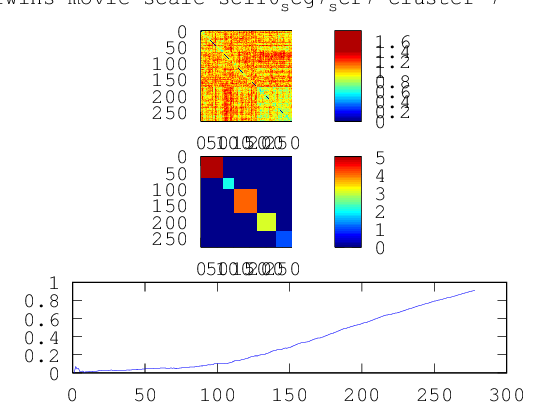

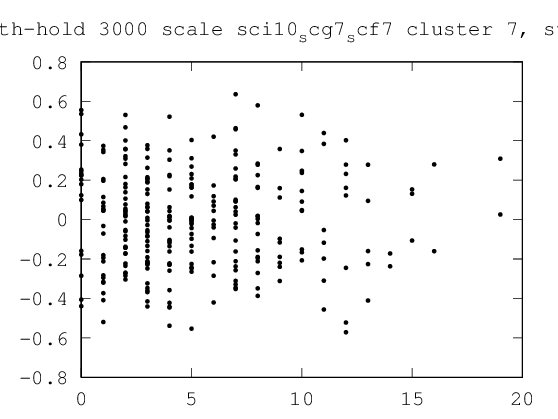

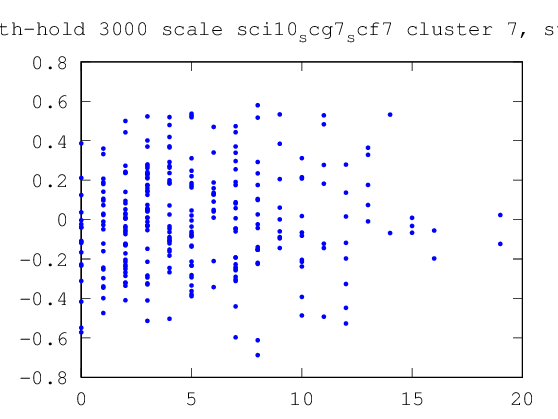

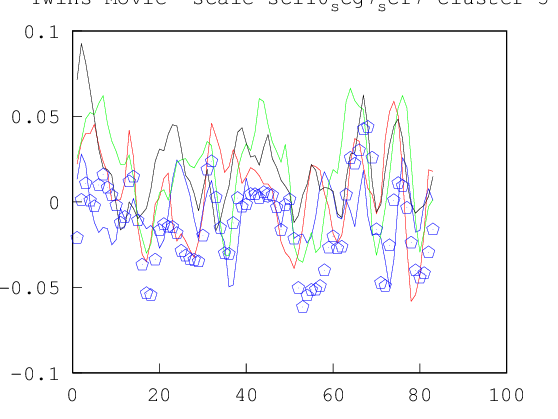

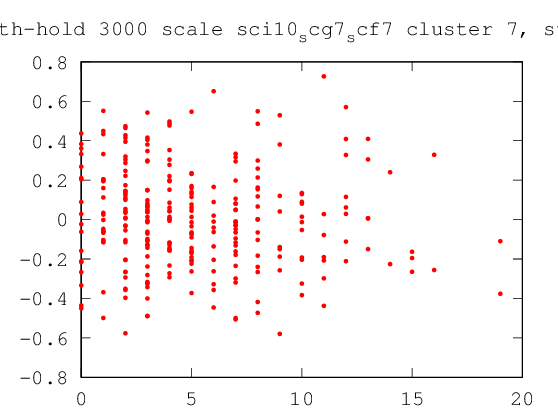

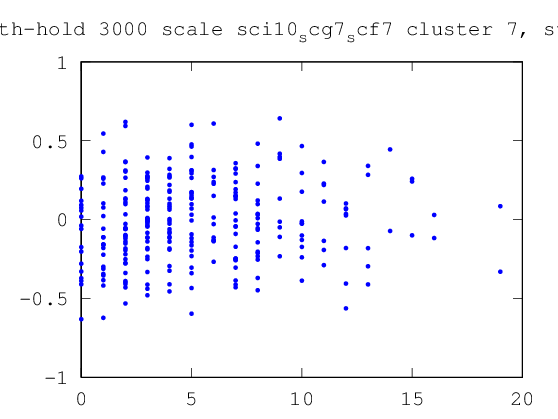

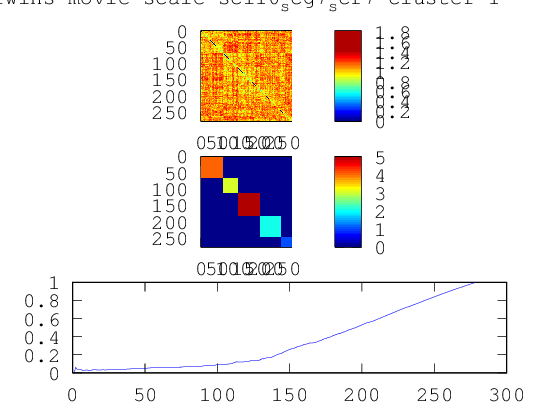

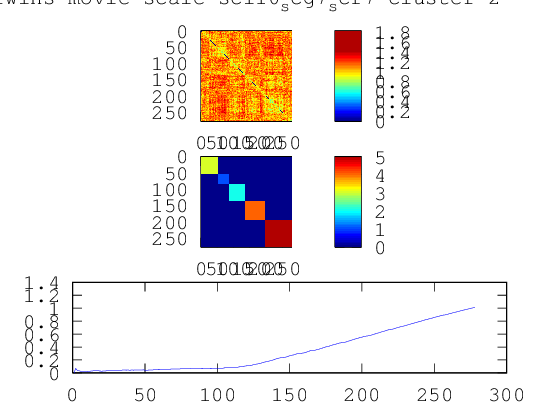

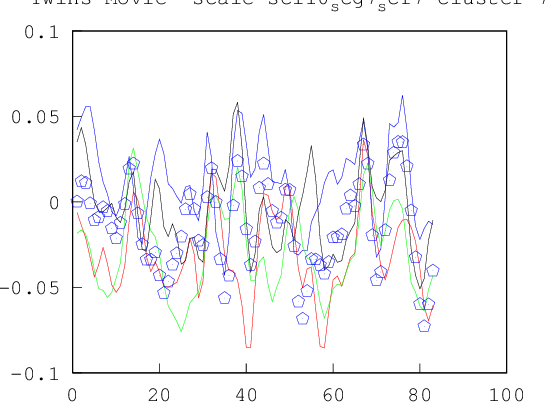

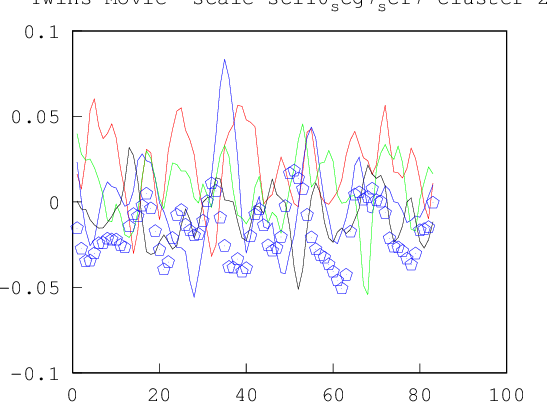

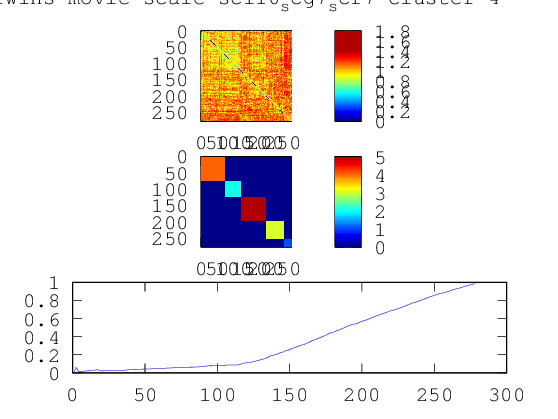

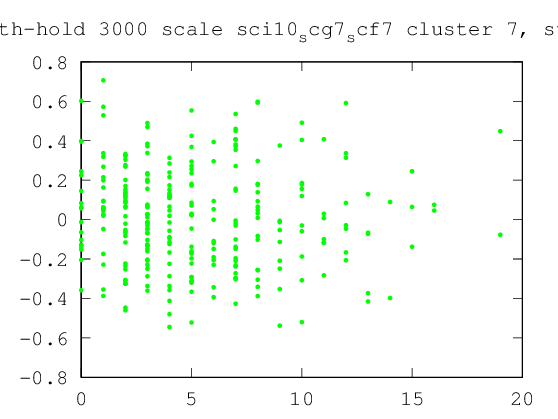

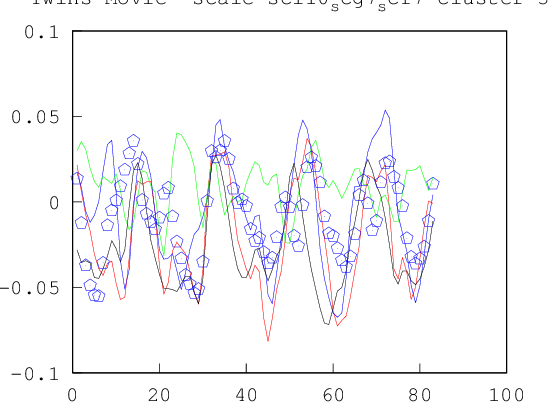

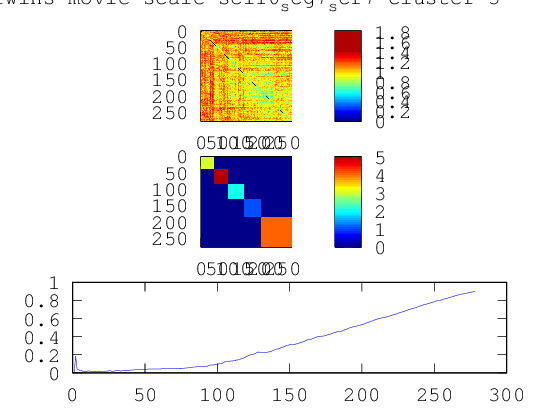

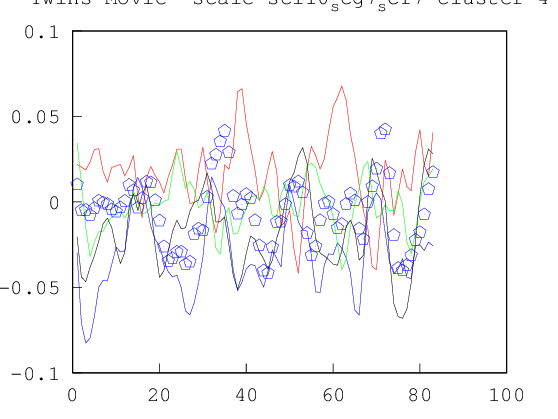

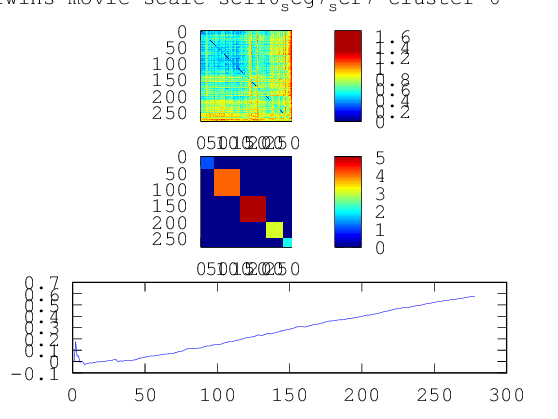

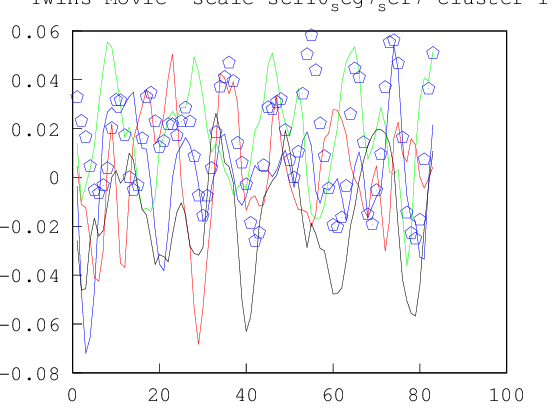

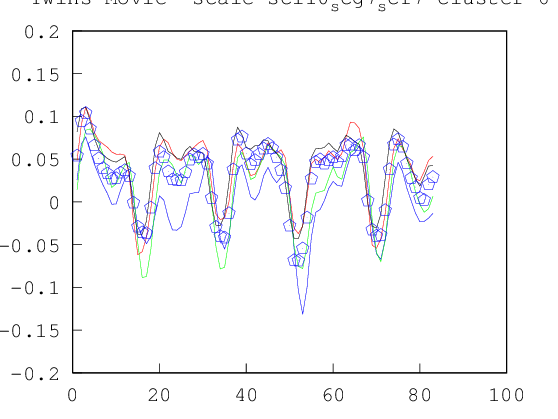

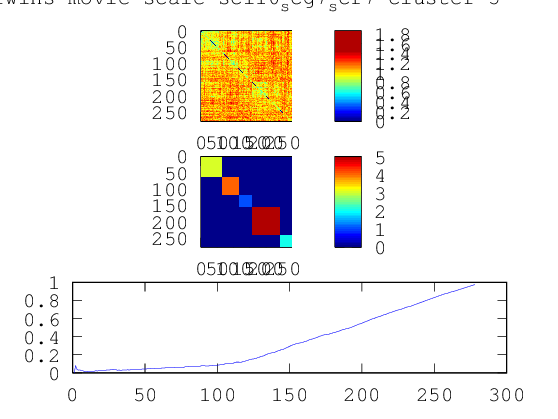

     Percentage done : 0 5 10 15 20 25 30 35 40 45 50 55 60 65 70 75 80 85 90 95 100 Done ! 
     Percentage done : 0 5 10 15 20 25 30 35 40 45 50 55 60 65 70 75 80 85 90 95 Done ! 
Twins_movie, max silhouette NaN at scale 5
No protocol specified

gnuplot: unable to open display 'unix:0'
gnuplot: X11 aborted.

multiplot> et termoption dashed
           ^
           line 0: invalid command

dominic_dep
sexe
FD
     Percentage done : 0 5 10 15 20 25 30 35 40 45 50 55 60 65 70 75 80 85 90 95 100 Done ! 
     Percentage done : 0 5 10 15 20 25 30 35 40 45 50 55 60 65 70 75 80 85 90 95 Done ! 
Twins_movie, max silhouette NaN at scale 5
dominic_dep
sexe
FD
No protocol specified

gnuplot: unable to open display 'unix:0'
gnuplot: X11 aborted.
No protocol specified

gnuplot: unable to open display 'unix:0'
gnuplot: X11 aborted.

gnuplot> nset obj 1;
         ^
         line 0: invalid command

No protocol specified

gnuplot: unable to open display 'unix:0'
gnuplot: X11 aborted.
No protocol speci

In [63]:
%% Hierarchical clustering
clf
for tt = 1:length(tr)
    hold off
    for ii = 1:length(list_ind)
        % Clustering of subtypes
        figure(ii)
        clf
        fir_td = squeeze(fir_all{tt}(:,list_ind(ii),:));
        fir_td = fir_td./repmat(sqrt(sum(fir_td.^2,1)),[size(fir_td,1) 1]);
        fir_td(isnan(fir_td)) = 0;
        fir_td = fir_td - repmat(mean(fir_td,2),[1 size(fir_td,2)]);
        D = niak_build_distance (fir_td);
        hier = niak_hierarchical_clustering (-D);
        sil = niak_build_avg_silhouette(-D,hier);
        %[val,nb_clust(tt)] = max(sil(1:50));
        val = NaN;
        nb_clust(tt) = 5;
        fprintf('Twins_movie, max silhouette %1.2f at scale %i\n',val,nb_clust(tt))
        part = niak_threshold_hierarchy (hier,struct('thresh',nb_clust(tt)));
        order = niak_hier2order (hier);
        subplot(3,length(tr),tt)
        niak_visu_matrix(D(order,order));
        title(sprintf('Twins movie scale %s cluster %i',list_scale{1},list_ind(ii)));
        subplot(3,length(tr),tt+length(tr))
        niak_visu_part(part(order))
        subplot(3,length(tr),tt+2*length(tr))
        plot(sil)
        %hold on
        %plot(nb_clust(tt),val,'rx')
        %hold off
        % Show the subtypes
        figure(ii+length(list_ind))
        clf
        subplot(1,length(tr),tt)
        title(sprintf('Twins-Movie  scale %s cluster %i',list_scale{1},list_ind(ii)));
        for cc = 1:nb_clust(tt)        
            hold on 
            plot(mean(fir_all{tt}(:,list_ind(ii),part==cc),3),list_color{cc})
        end
        hold off
        %% Build distance scores for all subtypes
        for cc = 1:nb_clust(tt)        
            avg_clust(:,cc) = mean(fir_td(:,part==cc),2);
            %weights(:,cc) = sum((fir_td-repmat(avg_clust(:,cc),[1 size(fir_td,2)])).^2);
            weights(:,cc) = corr(fir_td,avg_clust(:,cc));
        end
        
        %% GLM analysis 
        list_cov = { 'dominic_dep','sexe','FD' };
        mask_covar = [];
        ind=[];
        covar = [];
        for cco = 1:length(list_cov)
            ind_cov = find(ismember(ly,list_cov{cco}));
            covar = [covar pheno_num(:,ind_cov)];
            mask_covar =[mask_covar ~isnan(covar)];   
        end
        [y,x]=find(mask_covar == 0);
        ind = ones(size(mask_covar),1);
        ind(unique(y)) = 0;
        model_tmp = [];
        % load model
        for ccx = 1 : length(list_cov)
            model_tmp = [model_tmp niak_normalize_tseries(covar(logical(ind),ccx),'none')];
        end    
        model_covar.x = [ones(sum(ind),1) model_tmp];
        model_covar.y = weights(logical(ind),:);
        for cco = 1:length(list_cov) 
            ind_cov = find(ismember(ly,list_cov{cco}));
            model_covar.c = zeros(1,size(model_covar.x,2))';           
            model_covar.c(cco+1) = 1;
            opt_glm.test = 'ttest';
            opt_glm.flag_beta = true;
            res_covar = niak_glm(model_covar,opt_glm);
            fprintf('%s\n',ly{ind_cov});
            pce(cco,:,ii) = res_covar.pce;
        end
        %plot glm
        hold off
        for pp = 1:nb_clust(tt)
            figure(ii+pp+length(list_ind))
            clf
            plot(model_covar.x(:,2),model_covar.y(:,pp),[list_color{pp} '.'])
            title(sprintf('Breath-hold %s scale %s cluster %i, subtype %i',tr{tt},list_scale{1},list_ind(ii),pp));
        end
    end
end

In [64]:
[fdr,test] = niak_fdr(pce(:),'BH',0.05);

In [66]:
[fdr test]
pce

pce =

ans(:,:,1) =

   0.485725   0.963095   0.983359   0.427288   0.860498
   0.906478   0.253904   0.231024   0.242568   0.214508
   0.713855   0.973715   0.010298   0.854156   0.019579

ans(:,:,2) =

   0.705770   0.835593   0.713827   0.324494   0.348674
   0.756424   0.384736   0.760648   0.915878   0.384175
   0.724357   0.110166   0.966316   0.067858   0.895440

ans(:,:,3) =

   6.1505e-01   1.2870e-01   8.3303e-01   3.8158e-01   2.6755e-01
   3.9557e-01   3.8832e-01   1.5930e-01   6.2035e-01   2.6717e-01
   8.5897e-06   9.8224e-03   1.2924e-07   7.8357e-01   3.0938e-01

ans(:,:,4) =

   0.221420   0.250869   0.485607   0.222578   0.798063
   0.055327   0.994781   0.287766   0.055173   0.736972
   0.043900   0.354644   0.061566   0.152836   0.304410

ans(:,:,5) =

   0.679185   0.568746   0.160847   0.141864   0.572038
   0.339647   0.293591   0.046281   0.537502   0.979274
   0.298479   0.173713   0.658504   0.291140   0.155676

ans(:,:,6) =

   7.5890e-01   3.8692e-01   2.928